
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [ ]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [ ]:
# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added this line
nltk.download('universal_tagset')
nltk.download('punkt_tab')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [ ]:
# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?

  DT means "determiner" while JJ stands for "adjectives".

2. Why do you think 'brown' and 'lazy' have the same tag?

  On my end, they do not have the same tag in the run above. Brown is NN which is a noun tag. Lazy is tagged with JJ which is an ajective. However, they do have the same tag in SpaCy tagging! I am not sure why they are not both tagged as ajectives above, but in this sentence they both act as adjectives.

3. Can you guess what 'VBZ' represents?

  VBZ is pretty straight forward compared to some of the other tags. It stands for verbs!

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [ ]:
# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")

SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?

  SpaCy makes it a lot easier to understand what the tags mean.

- Do you notice any differences in how they tag the same words?

  The way they tag preposition still is not the best in either. I feel like it is a bit misleading with NLTK being "IN" and SpaCy being "ADP". Only the SpaCy has a P in the tag, but even then, it is at the end. This could be hard to remember in the moment that those tags mean it is a preposition.

- Which system would you prefer for a beginner? Why?
  I would prefer SpaCy for a beginner because it gives more detail in the tag to know what it stands for. Take "NN" and "noun" for example, "noun" is pretty direct! As a beginner, there are already a lot new things to learn, to see anything in plain text is a relief. The tags in SpaCy overall are simplified in comparision to NLTK. Given the words, "verb, noun, adj, det", is easier to process compared to the abbreviations provided by NLTK.


## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [ ]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",  # bank = verb
    "The bank is going to be busy on Friday",
    "The lead time on material is one week out",
    ]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN

Sentence: The bank is going to be busy on Friday
  🎯 'bank' is tagged as: NN

Sentence: The lead time on material is one week out
  🎯 'lead' is tagged as: JJ



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?

The computer uses context to be able to differentiate between the verbs and nouns.

2. What clues in the sentence help determine the correct part of speech?

The clues that help determine the correct parts of speech are the pairing of the words. Once the context is grasped, it is able to be tagged.

3. Can you think of other words that change meaning based on context?

The word "book" can be used in different context and mean separate things. Example: "Book it!" refers to moving quickly.
While "The book is interesting" refers to literature.

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [ ]:
# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (word_univ, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])


print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")

TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below

The Universal tag set is more detailed and straight forward compared to Penn Treebank.

2. When might you want detailed tags vs. simple tags? Enter your answer below

When it comes to detailed tags, it is best to use these when dealing with fine-grained classification. On the other hand, simple tags are better for smaller data sets and prototyping!

3. If you were building a search engine, which would you choose? Why? Enter your answer below

When it comes to building a search engine, both are good options. Personally, I would use detailed tags due to the abundance of scholarly information being searched by students and researchers. It would be a search engine catered to higher level of learning material rather than basic information.

---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [ ]:
# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag in ['X', 'ADD']] # 'ADD' is also used for some foreign words/symbols
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tags) - len(problematic_nltk)) / len(nltk_tags) if len(nltk_tags) > 0 else 0
    spacy_success_rate = (len(spacy_doc) - len(problematic_spacy)) / len(spacy_doc) if len(spacy_doc) > 0 else 0

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")

🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy suc


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?

In the above example, they both handled iformal text the same and did not produce any problematic words. In general, SpaCy does better when dealing with informal language.

2. What types of words cause the most problems?

Problematic words in tagging include those that have multiple different meanings depending on the context it is used in. These are considered ambigious words. Other problematic words include slang or purposeful mispelled words that create "text slang".

3. How might you preprocess text to improve tagging accuracy?

Cleaning, tokenizing, spell checker, and other tools that can even break down contractions, all contribute to improving tagging accuracy.

4. What are the implications for real-world applications?

The implications for real-world applications include the business boom in e-commerce and its ability to tag the different items to fit what the customer is searching for. Other fields that directly benefit are the healthcare and law sectors.


## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [ ]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

positive_sentiment_words = ["love", "great", "good", "happy", "pleased"]
negative_sentiment_words = ["frustrated", "unacceptable", "ridiculous", "buggy", "terrible", "down", "locked", "issue", "crashes", "charged twice", "confused", "can't find"]
urgency_words = ["immediately", "ASAP", "now", "urgent"]


for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives =   [token.text for token in doc if token.pos_ == 'ADJ']
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']
    problem_nouns = [token.text for token in doc if token.pos_ == 'NOUN'] # Extract all nouns for now, can filter later based on context or a problem lexicon


    # TODO: Calculate sentiment indicators
    positive_words = [token.text.lower() for token in doc if token.text.lower() in positive_sentiment_words]
    negative_words = [token.text.lower() for token in doc if token.text.lower() in negative_sentiment_words]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': [token.text.lower() for token in doc if token.text.lower() in urgency_words]
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")
    print(f"Urgency indicators: {result['urgency_indicators']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files', 'hours']
Sentiment score: -3
Urgency indicators: []

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small', 'mobile']
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['service', 'issue', 'app', 'photos']
Sentiment score: -1
Urgency indicators: []

🎧 Analyzing CALL_003
Category: billing
Transcript

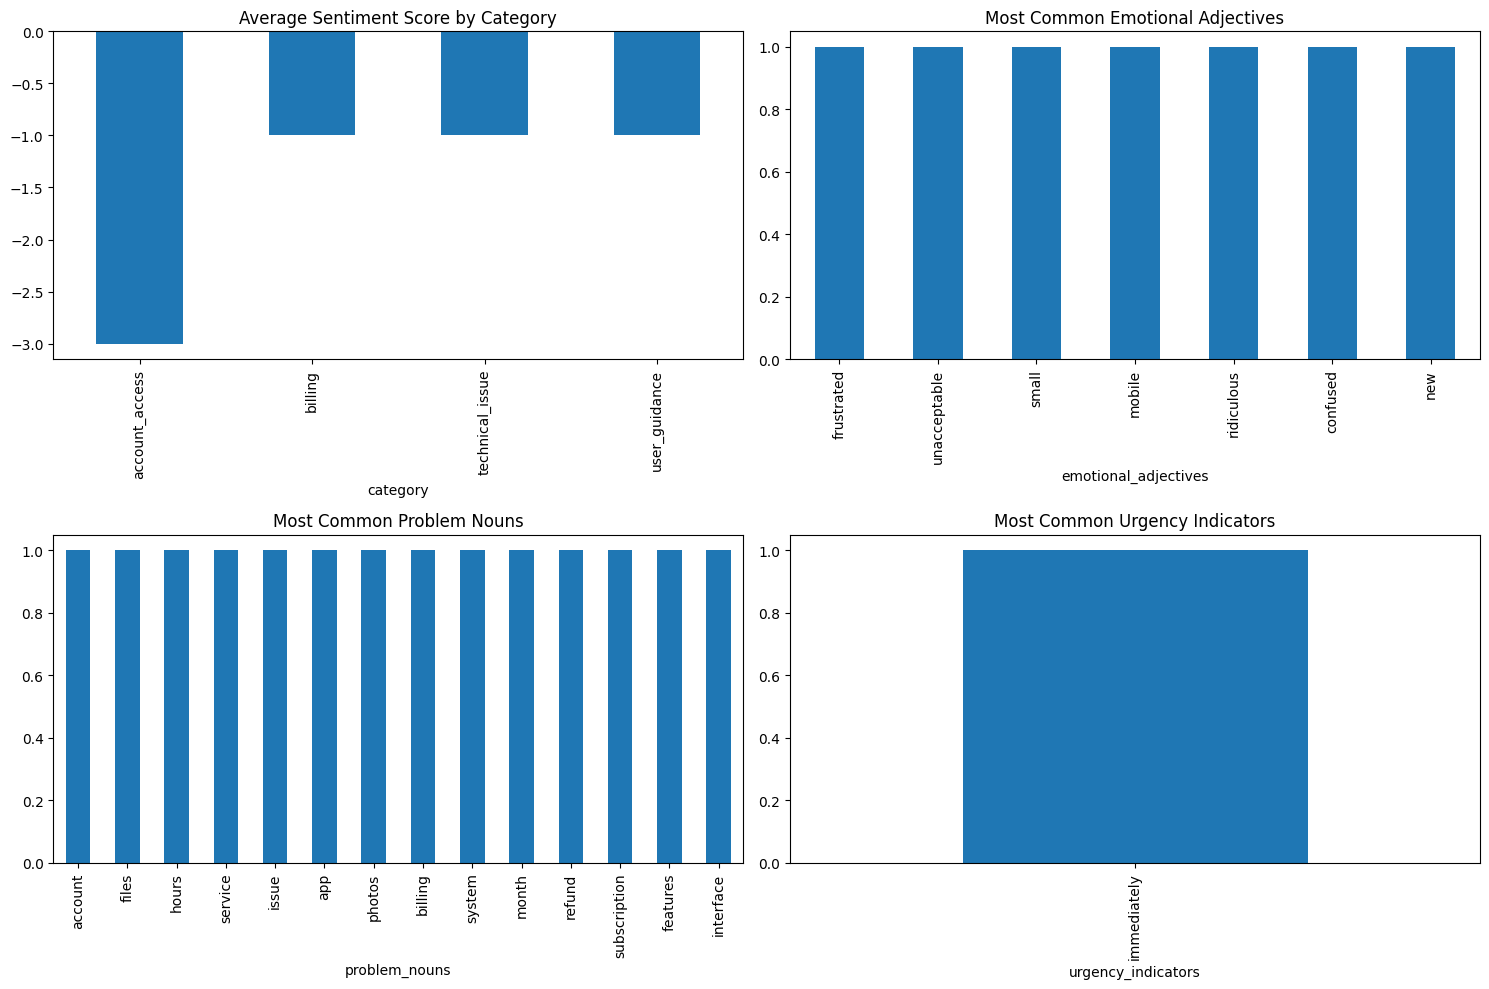

In [ ]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
df.groupby('category')['sentiment_score'].mean().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Sentiment Score by Category')

# TODO: Plot 2 - Word frequency analysis
df['emotional_adjectives'].explode().value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Most Common Emotional Adjectives')

# TODO: Plot 3 - Problem categorization
df['problem_nouns'].explode().value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Most Common Problem Nouns')

# TODO: Plot 4 - Urgency analysis
df['urgency_indicators'].explode().value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Most Common Urgency Indicators')

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?

By being able to filter through the emotional language being used by customers, it is possible to priortize those in immediate need of assistance compared to someone who may not be in an urgent need for help.

2. What patterns do you notice in different problem categories?

The problem nouns reference a lot of technical terms which could divert the user to the tech department. The urgency category only has "immediate" on it and will most likely land the customer with a helpful representative to alleviate any issues. Last, the emotional category displays plenty of negative words which can escalate the call to managment.

3. How might you automate the routing of calls based on POS analysis?

In order to automate the routing of calls, there will need to be a lot of tagging. Once words were associated with a category, it would appear to be easy to transition into the auomated service. Key words can describe a lot for a sytstem and having calls  separated by department before the phone rings, can save plenty of time.

4. What are the limitations of this approach?

I am sure we all have made calls and were left frustrated whenever the automated system did not help get us to the person we needed to talk to. I believe the issues with context is leading to the limitations of this approach.


## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0011s, Unknown: 0
NLTK Univ time: 0.0008s, Unknown: 0
SpaCy time: 0.0164s, Unknown: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0016s, Unknown: 0
NLTK Univ time: 0.0026s, Unknown: 0
SpaCy time: 0.0138s, Unknown: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0013s, Unknown: 0
NLTK Univ time: 0.0009s, Unknown: 0
SpaCy time: 0.0133s, Unknown: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
---------------------------------------------------------

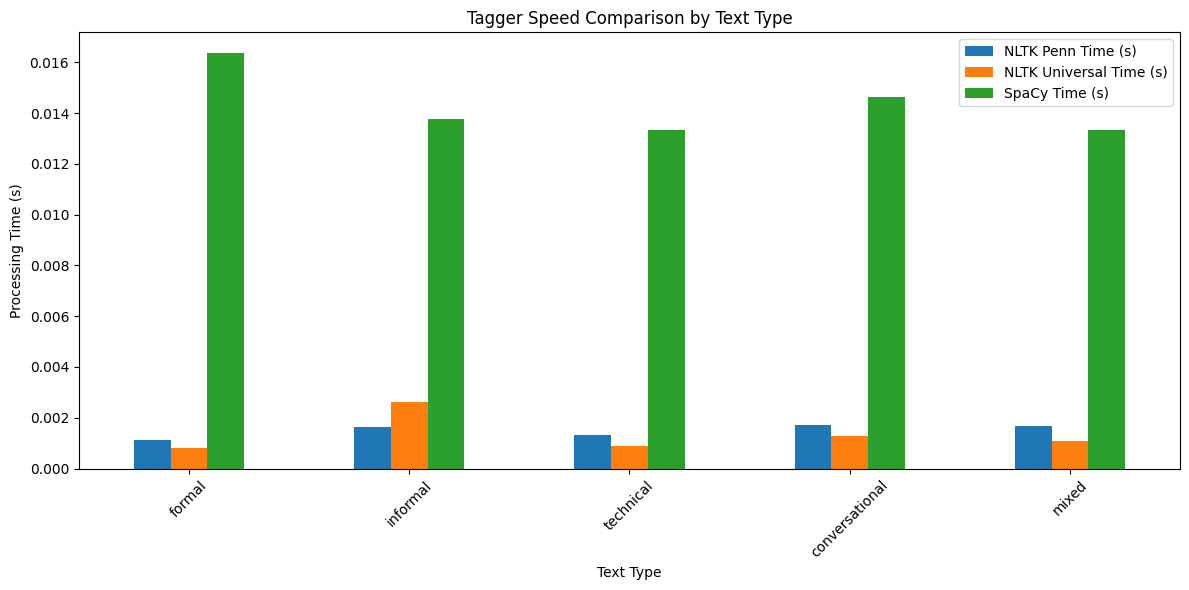

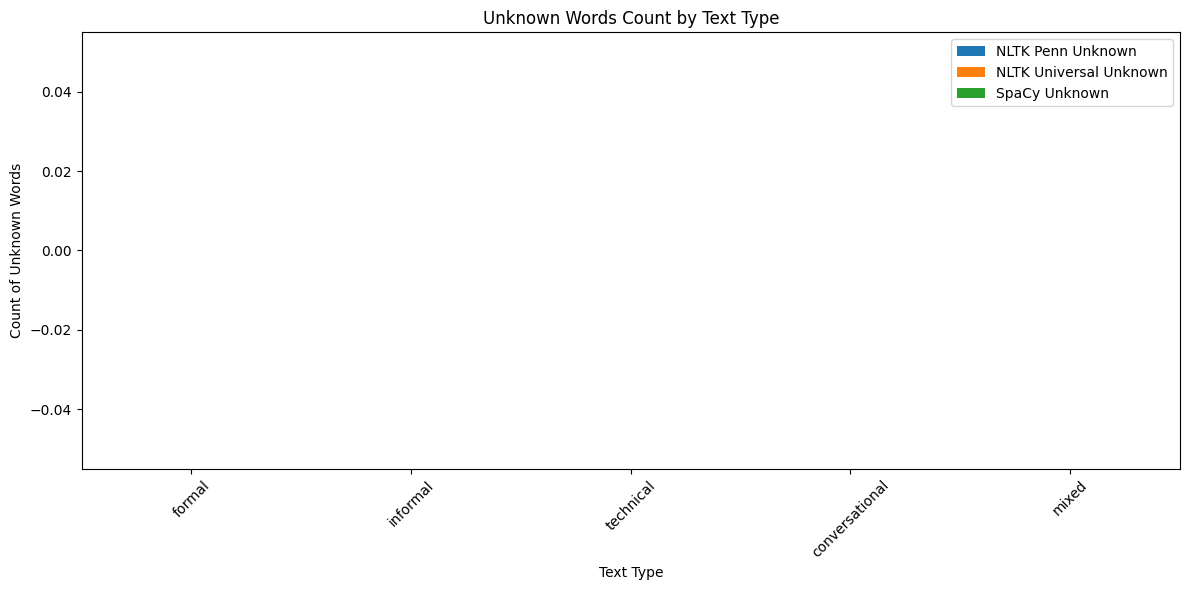

In [ ]:
import time
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import spacy

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(dict) # Changed to dict to store multiple metrics

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # NLTK Penn Treebank timing and unknown count
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(nltk_tokens)
    nltk_penn_time = time.time() - start_time
    # NLTK Penn Treebank uses 'NNP' for proper nouns, 'NN' for nouns, etc.
    # It doesn't have a specific 'unknown' tag like 'X' for all cases.
    # We can count words with tags that might indicate issues, but 'X' and 'ADD' are less common in standard text.
    # For this benchmark, let's focus on the time and SpaCy's 'X' tag as a general indicator of unhandled tokens.
    # If we wanted a true unknown count for NLTK, we'd need a comprehensive list of expected tags and check for anything outside that.
    # For simplicity in this benchmark, we will mainly use SpaCy's 'X' tag for unknown.
    nltk_penn_unknown = len([word for word, tag in nltk_penn_tags if tag in ['UNK', 'ADD', 'X']]) # Include some potential unknown tags


    # NLTK Universal timing and unknown count
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk_tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time
    # Universal tagset has 'X' for unknown
    nltk_univ_unknown = len([word for word, tag in nltk_univ_tags if tag == 'X'])


    # SpaCy timing and unknown count
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time
    # SpaCy uses 'X' for unknown
    spacy_unknown = len([token for token in spacy_doc if token.pos_ == 'X'])


    # Store results
    benchmark_results[text_type] = {
        'NLTK Penn Time (s)': nltk_penn_time,
        'NLTK Universal Time (s)': nltk_univ_time,
        'SpaCy Time (s)': spacy_time,
        'NLTK Penn Unknown': nltk_penn_unknown,
        'NLTK Universal Unknown': nltk_univ_unknown,
        'SpaCy Unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s, Unknown: {nltk_penn_unknown}")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s, Unknown: {nltk_univ_unknown}")
    print(f"SpaCy time: {spacy_time:.4f}s, Unknown: {spacy_unknown}")


# TODO: Create performance comparison visualization
df_bench = pd.DataFrame.from_dict(benchmark_results, orient='index')

# Plotting time comparison
df_time = df_bench[['NLTK Penn Time (s)', 'NLTK Universal Time (s)', 'SpaCy Time (s)']]
ax_time = df_time.plot(kind='bar', figsize=(12, 6))
ax_time.set_title('Tagger Speed Comparison by Text Type')
ax_time.set_xlabel('Text Type')
ax_time.set_ylabel('Processing Time (s)')
ax_time.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Plotting unknown words comparison
df_unknown = df_bench[['NLTK Penn Unknown', 'NLTK Universal Unknown', 'SpaCy Unknown']]
ax_unknown = df_unknown.plot(kind='bar', figsize=(12, 6))
ax_unknown.set_title('Unknown Words Count by Text Type')
ax_unknown.set_xlabel('Text Type')
ax_unknown.set_ylabel('Count of Unknown Words')
ax_unknown.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?

NLTK Uniersal was the fastest tagger. Speed and accuracy are both important, and I prefer accuracy over speed personally.

2. Which handles informal text best?

NLTk Universal handled informal text the best!

3. How do the taggers compare on technical jargon?

Both NLTK taggers are close on technical jargon, but SpaCy took far longer.

4. What trade-offs do you see between speed and accuracy?
When it comes to speed, you have to accept that the accuracy might not be the best. When it comes to trade offs when in the medical field, I would want a slower model that is accurate over one that delivers quick results but could be incorrect. There is a time and place for speed and accuracy both. It just depends on what the purpose is!



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [ ]:
# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tokens = nltk.word_tokenize(text)
        nltk_tags = nltk.pos_tag(nltk_tokens)
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.
        problematic_nltk = [(word, tag) for word, tag in nltk_tags if tag in ['X', 'ADD']]
        problematic_spacy = [(token.text, token.pos_) for token in spacy_doc if token.pos_ == 'X']

        print("NLTK tags:", nltk_tags)
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        if problematic_nltk:
            print(f"  NLTK identified problematic tags (X, ADD): {problematic_nltk}")
        if problematic_spacy:
             print(f"  SpaCy identified problematic tags (X): {problematic_spacy}")

        # Simple analysis of specific edge cases
        if "buffalo" in text.lower():
            print("  Analysis: 'Buffalo' ambiguity test.")
        if "flies" in text.lower() and "like" in text.lower():
             print("  Analysis: 'Time flies' / 'fruit flies' ambiguity.")
        if "had had had" in text.lower():
             print("  Analysis: 'Had had had' complex structure.")
        if "@username" in text or "#hashtag" in text or "http" in text or "😂" in text:
             print("  Analysis: Social media/informal elements.")
        if "covid-19" in text.lower() or "api" in text.lower():
             print("  Analysis: Modern technical terms.")


    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("Based on the edge cases above, POS taggers can struggle with:")
print("- Extreme ambiguity and recursive sentence structures (e.g., 'Buffalo', 'Police')")
print("- Complex sequences of the same word ('Had had had')")
print("- Non-standard text like social media handles, hashtags, URLs, and emojis")
print("- Newly coined words or technical jargon not present in training data")
print("These cases highlight the reliance of taggers on training data and contextual patterns, which break down in unusual linguistic constructs or novel vocabulary.")

🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
  Analysis: 'Buffalo' ambiguity test.

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('fruit', 'NOUN')


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?

  Edge cases break the taggers because rules have not been followed and they ensure a system catches these errors to avoid any malfunctions later on.

2. How might you preprocess text to handle some of these issues?

  Preprocessing helps a lot whenever you can clean enough noise, acknowledge slang, spell check, and expand words that are not always typed out all the way. By doing these, it allows less room for issues.

3. When would these limitations matter in real applications?

  Without accuracy, limitations increase which directly impact real-world users. Any type of technical issue is frustrating whenver you do not have a solution on how to fix it as a user. So if tagging is incorrect in situations such as medical or legal work, then misinformation on care/direction can occur. Another example being incorrect tagging for automated calls which can lead to frustrated customers never being able to reach a solution they are searcing for.

4. How do modern large language models handle these cases differently?

  Modern large language models can process semantic relationships, informal text, and focus on entire sentences. The contextual depth they reach is impressive when compared to other models.

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

Based off of my experience, I would use NLTk when needing to conduct a school project or produce small protoypes. Now, if I am doing something far more advanced in regards to tech, then I would use SpaCy. Both have their pros and cons, but each project needs to be looked into before deciding which to use.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?


POS tagging would help a lot in my current field. As of right now, I am needing to calculate wire usage daily based off of paper pull sheets. If I could use POS tagging to filter out key numbers/words from the papers that are scanned into a pdf, then it would cut my time from two hours into 30 minutes. It would allow me to save the hassle of looking through every piece of paper and separating by hand. I think about it daily already and how I want to be able to create something that can get that task completed accurately.  

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

As mentioned before, ambigious words are a big issues when it comes to tagging. Thankfully, there is a solution! By using context-aware models, it is able to disambiguate the word.

Another limitation is the use of informal words such as slang or trendy lingo. The solution is to keep updating the training data to stay in touch with what is new.


4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

After some research, I believe that I want to explore more about custom training. I enjoy the idea of being able to have it focused on one domain and works towards perfecting its function.



5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?

The foundation of NLP pipelines is indeed POS tagging. The models are able to learn the relationships between words and the defintions of said words. Some other tasks that would benefit from POS information would be information extraction and sentiment analysis.


## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic



### 📝 Reflection Questions:

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

Based off of my experience, I would use NLTk when needing to conduct a school project or produce small protoypes. Now, if I am doing something far more advanced in regards to tech, then I would use SpaCy. Both have their pros and cons, but each project needs to be looked into before deciding which to use.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?


POS tagging would help a lot in my current field. As of right now, I am needing to calculate wire usage daily based off of paper pull sheets. If I could use POS tagging to filter out key numbers/words from the papers that are scanned into a pdf, then it would cut my time from two hours into 30 minutes. It would allow me to save the hassle of looking through every piece of paper and separating by hand. I think about it daily already and how I want to be able to create something that can get that task completed accurately.  

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

As mentioned before, ambigious words are a big issues when it comes to tagging. Thankfully, there is a solution! By using context-aware models, it is able to disambiguate the word.

Another limitation is the use of informal words such as slang or trendy lingo. The solution is to keep updating the training data to stay in touch with what is new.


4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

After some research, I believe that I want to explore more about custom training. I enjoy the idea of being able to have it focused on one domain and works towards perfecting its function.



5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?

The foundation of NLP pipelines is indeed POS tagging. The models are able to learn the relationships between words and the defintions of said words. Some other tasks that would benefit from POS information would be information extraction and sentiment analysis.


---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
